In [18]:
import requests
import nltk
import pandas as pd
import datetime as dt
import re
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#identify url  
slug = 'gcodingcomps' #have 'slug' = the id of the Twitter account
#slug = input("please give a twitter handle : ")  #Use this 'slug' and comment out previous to have an input box to enter slug

url = 'https://twstalker.com/' + slug
page = requests.get(url)

#create soup
soup = BeautifulSoup(page.content, "html.parser")
job_elements = soup.find_all("p")
tweets = []

for job_element in job_elements:
    element = job_element.text
    tweets.append(element)
    
tweets = tweets[1:]
print(tweets)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\civic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\civic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["📌 Software Engineer Chu-Ling Ko helps design competition problems, including those for this year's Code Jam to I/O for Women.\n\nHer advice during #WomensHistoryMonth and beyond? Enjoy the work you do while taking it seriously. → goo.gle/3HOXo0J    ", '👍 Kick Start Round A is coming soon. \n\nSAVE THE DATE: March 20 4:00 UTC - 7:00 UTC\n\nGrow your skills with a variety of algorithmic challenges designed by Google engineers in this three hour round. \n\nRegister here → goo.gle/KickStart2022 ', '👋 Meet the women making developer communities more inclusive for generations to come. In honor of #WomensHistoryMonth, we spoke with trailblazers making their mark on Google developer communities and beyond. → goo.gle/3hNASuy    ', "#CodeJam is back for it's 19th year.  \n\n🌎  Join our global community of coders and register today → goo.gle/codejam2022 ", "🔴  #CodeJam – @Google's longest running global coding competition – is now open.\n\nSolve intriguing algorithmic puzzles for a chance to ea

In [20]:
#Store tweets in a dataframe
df = pd.DataFrame(tweets)
df = df[0]
df

0     📌 Software Engineer Chu-Ling Ko helps design c...
1     👍 Kick Start Round A is coming soon. \n\nSAVE ...
2     👋 Meet the women making developer communities ...
3     #CodeJam is back for it's 19th year.  \n\n🌎  J...
4     🔴  #CodeJam – @Google's longest running global...
5     Congratulations and thank you to all #HashCode...
6     We're LIVE with @Google engineers to talk abou...
7     🏁 The #HashCode 2022 Qualification Round is of...
8     The #HashCode Qualification Round has begun.\n...
9     We are live 🎬 \n\nThe #HashCode Qualification ...
10    It's #HashCode Qualification Round Day.\n\n🔷 T...
11    🇫🇷 Bonjour, Hash Coders! \n\nThe #HashCode tea...
12    ⏰ We are 24 hours away. \n\nOne more sleep and...
13    📢 Great news, #HashCode registration has been ...
14    🚨 #CODEJAM – @Google's longest running global ...
15    ✍️ Catch up on Coding Practice with Kick Start...
16    ⏳ IT'S THE FINAL COUNTDOWN! \n\nThis is your r...
17    📣 There are 2 more Coding Practice Session

In [21]:
#Split words from sentences
all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:
    words = line.split()
    for w in words:
        lines.append(w)
print(lines)

['📌', 'Software', 'Engineer', 'Chu-Ling', 'Ko', 'helps', 'design', 'competition', 'problems,', 'including', 'those', 'for', 'this', "year's", 'Code', 'Jam', 'to', 'I/O', 'for', 'Women.', 'Her', 'advice', 'during', '#WomensHistoryMonth', 'and', 'beyond?', 'Enjoy', 'the', 'work', 'you', 'do', 'while', 'taking', 'it', 'seriously.', '→', 'goo.gle/3HOXo0J', '👍', 'Kick', 'Start', 'Round', 'A', 'is', 'coming', 'soon.', 'SAVE', 'THE', 'DATE:', 'March', '20', '4:00', 'UTC', '-', '7:00', 'UTC', 'Grow', 'your', 'skills', 'with', 'a', 'variety', 'of', 'algorithmic', 'challenges', 'designed', 'by', 'Google', 'engineers', 'in', 'this', 'three', 'hour', 'round.', 'Register', 'here', '→', 'goo.gle/KickStart2022', '👋', 'Meet', 'the', 'women', 'making', 'developer', 'communities', 'more', 'inclusive', 'for', 'generations', 'to', 'come.', 'In', 'honor', 'of', '#WomensHistoryMonth,', 'we', 'spoke', 'with', 'trailblazers', 'making', 'their', 'mark', 'on', 'Google', 'developer', 'communities', 'and', 'beyon

In [22]:
#Remove punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
#lines

In [23]:
#import SnowballStemmer
from nltk.stem.snowball import SnowballStemmer

#stemming to break words down to root word
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines:
    stem.append(s_stemmer.stem(word))
#stem

In [24]:
#remove stop words
#import Spacy
import spacy
nlp = spacy.load('en_core_web_sm')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
stem2

['',
 'softwar',
 'engin',
 'chule',
 'ko',
 'help',
 'design',
 'competit',
 'problem',
 'includ',
 'year',
 'code',
 'jam',
 'io',
 'women',
 'advic',
 'dure',
 'womenshistorymonth',
 'enjoy',
 'work',
 '',
 'google3hoxo0j',
 '',
 'kick',
 'start',
 'round',
 'come',
 'soon',
 'save',
 'date',
 'march',
 '20',
 '400',
 'utc',
 '',
 '700',
 'utc',
 'grow',
 'skill',
 'varieti',
 'algorithm',
 'challeng',
 'design',
 'googl',
 'engin',
 'hour',
 'round',
 'regist',
 '',
 'googlekickstart2022',
 '',
 'meet',
 'women',
 'develop',
 'communiti',
 'inclus',
 'generat',
 'come',
 'honor',
 'womenshistorymonth',
 'spoke',
 'trailblaz',
 'mark',
 'googl',
 'develop',
 'communiti',
 '',
 'google3hnasuy',
 'codejam',
 '19th',
 'year',
 '',
 'join',
 'global',
 'communiti',
 'coder',
 'regist',
 'today',
 '',
 'googlecodejam2022',
 '',
 'codejam',
 '',
 'googl',
 'longest',
 'run',
 'global',
 'code',
 'competit',
 '',
 'open',
 'solv',
 'intrigu',
 'algorithm',
 'puzzl',
 'chanc',
 'earn',
 'ti

In [25]:
#Convert stem words to dataframe
df = pd.DataFrame(stem2)
#count stem words
df = df[0].value_counts()
df

                           90
code                       20
round                      14
hashcod                    14
regist                     13
start                      10
session                    10
team                       10
hub                        10
qualif                      9
problem                     9
join                        8
utc                         8
practic                     8
2022                        7
competit                    7
hash                        7
compet                      6
24                          6
learn                       6
googl                       6
kick                        6
1                           6
virtual                     6
google3oz7aqk               5
come                        5
final                       4
tune                        4
live                        4
livestream                  4
action                      4
1730                        4
februari                    4
registr   

In [26]:
#import FreqDist
from nltk.probability import FreqDist

#Create frequency distribution
freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 122, 2: 38, 3: 26, 4: 17, 6: 7, 10: 4, 8: 3, 7: 3, 14: 2, 9: 2, ...})

In [27]:
#import matplotlib, numpy, seaborn
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\civic\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['stem']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


C:\Users\civic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


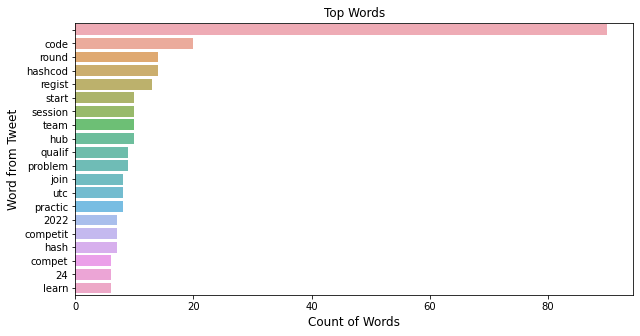

In [28]:
#Plot to show the top x (20) words being used and set plot size
plt.figure(figsize(10,5))
df = df[:20]

sns.barplot(df.values, df.index, alpha=0.8)
plt.title("Top Words")
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [29]:
#import displacy, counter, en_core_web_sm
#import spacy #should have already been imported
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [30]:
#create labels
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [31]:
#Categorize words
str1 = " "
stem2 = str1.join(lines)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

#from df6 pick Entity to display, ORG, PERSON, CARDINAL etc...
df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()
pd.set_option('display.max_rows', None)
print(df6)
dfsix = df6['Entity'].unique()
dfsix

                                                 Word       Entity
0                                                  Ko       PERSON
1                                          this years         DATE
2                                  WomensHistoryMonth       PERSON
3                                                 400     CARDINAL
4                                                 UTC          ORG
5                                                 700     CARDINAL
6                                     this three hour         TIME
7                                            Register       PERSON
8                                              Google          ORG
9                                             CodeJam          ORG
10                                          19th year         DATE
11                                              today         DATE
12                                            CodeJam          ORG
13                                            Googles       PE

array(['PERSON', 'DATE', 'CARDINAL', 'ORG', 'TIME', 'PRODUCT', 'EVENT',
       'WORK_OF_ART', 'GPE', 'ORDINAL'], dtype=object)

C:\Users\civic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


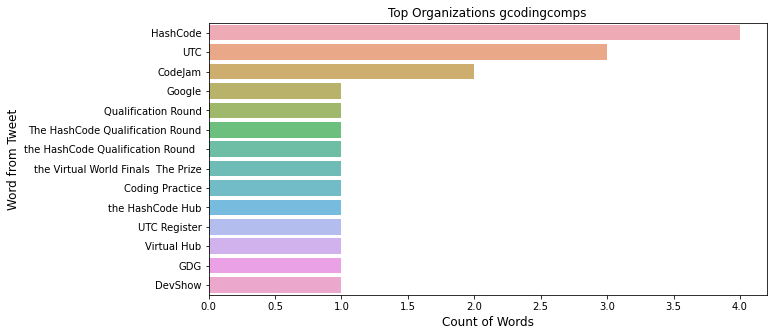

In [32]:
#Plot bar chart
df = df7[:20,]
plt.figure(figsize(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations ' + slug)
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()
